Importing library

In [1]:
import numpy as np
import pandas as pd

# 1. Reading the data#
## Data obtained from https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d##

In [2]:
df=pd.read_csv('Collisions_03102020.csv')
print(df.shape)

D:\Anaconda3\envs\TGPU\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(221525, 40)


# 2. Data Cleaning and removing empty values

In [3]:
df.drop(["INCKEY","COLDETKEY"],axis=1,inplace=True)

import seaborn as sns

D:\Anaconda3\envs\TGPU\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


UNDERINFL - shows whether or not a driver involved was under the influence of drugs or alcohol. It contains Y and 1, or N and 0 let's apply function to dataset to uniform

In [4]:
df["UNDERINFL"].unique()

array(['N', '0', nan, 'Y', '1'], dtype=object)

In [5]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return "Y"
    elif x in ['N','0']:
        return "N"
    else:
        return x
    
df["UNDERINFL"] = df["UNDERINFL"].apply(for_UNDERINFL)

Also, column SEVERITYCODE has nan values it better to analyze and move to corresponded category if applicalbe.

In [6]:
df["SEVERITYCODE"].fillna('0', inplace=True)

In [7]:
df["ADDRTYPE"].fillna('Not Mentioned', inplace=True)

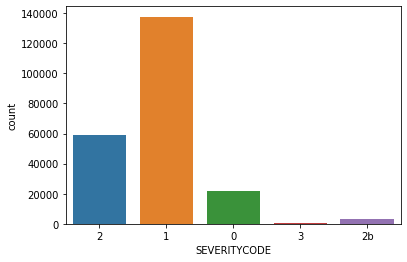

In [8]:
sns.countplot(df["SEVERITYCODE"])

The same data but in percentage 

In [9]:
df["SEVERITYCODE"].value_counts(normalize=True).round(2)

1     0.62
2     0.27
0     0.10
2b    0.01
3     0.00
Name: SEVERITYCODE, dtype: float64

Most accidents around 62% of accidents is "Property Damage Only Collision"(Category 1).
26% belong to "Injury Collision"(Category 2). other categories weight is less than 11 percent

# 3. Accidents trend by Month and Year

"Date of accindent" should be converted to appropriate format that could be feed to pandas so let us use astype to convert INCDATE and create to adiitonal columns to see information by month and year

In [11]:
df["INCDATE"]=pd.to_datetime(df["INCDATE"])
df["MONTH"] = df["INCDATE"].dt.month
df["YEAR"] = df["INCDATE"].dt.year

In [12]:
MONTH=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
DA=df.groupby(["YEAR","MONTH"])[["INCDATE"]].count()
RDA=DA.unstack().values
DA_C=pd.DataFrame(RDA,columns=MONTH,index=np.arange(2003,2021))
DA_C.fillna(0,inplace=True)
DA_C

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2004,1197.0,1060.0,1218.0,1254.0,1320.0,1287.0,1275.0,1361.0,1262.0,1443.0,1336.0,1444.0
2005,1192.0,1080.0,1333.0,1349.0,1395.0,1372.0,1396.0,1346.0,1304.0,1447.0,1417.0,1385.0
2006,1434.0,1232.0,1229.0,1307.0,1276.0,1327.0,1281.0,1318.0,1285.0,1356.0,1519.0,1230.0
2007,1325.0,1036.0,1275.0,1140.0,1297.0,1331.0,1304.0,1266.0,1244.0,1398.0,1270.0,1196.0
2008,1207.0,1024.0,1182.0,1193.0,1187.0,1153.0,1134.0,1259.0,1153.0,1302.0,1203.0,1142.0
2009,984.0,882.0,1059.0,1067.0,1283.0,1192.0,1205.0,1092.0,1082.0,1299.0,1128.0,1002.0
2010,998.0,950.0,944.0,902.0,977.0,1003.0,1026.0,1055.0,966.0,1176.0,1037.0,924.0
2011,1022.0,860.0,1075.0,1030.0,1051.0,1127.0,1029.0,1007.0,1060.0,1070.0,1059.0,1026.0
2012,936.0,880.0,1061.0,1042.0,1107.0,1033.0,1035.0,1137.0,1038.0,1258.0,1088.0,1117.0


It can be seen that there is only one accident is recorded however in documentation, it is said that all data is from 2004 till present.
for graph we will eliminate 2003 as it is possible incorrectly entered information.

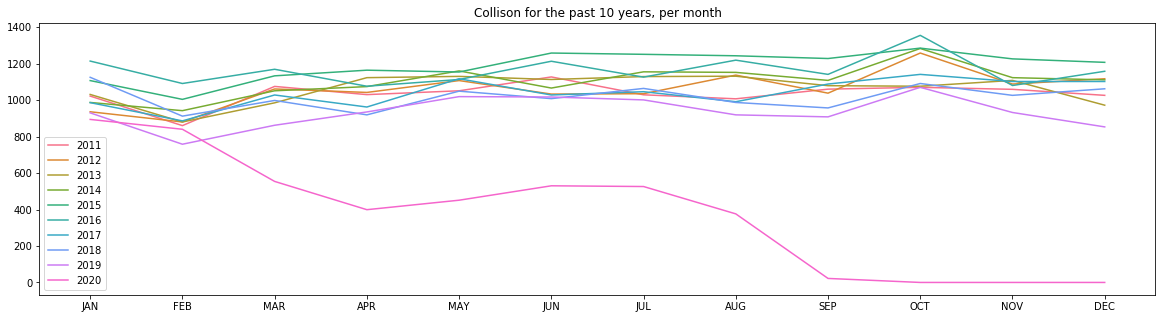

In [13]:
import matplotlib.pyplot as plt
sns.set_palette(sns.color_palette("rocket_r"))
plt.figure(figsize=(20,5))
plt.title("Collison for the past 10 years, per month")
sns.lineplot(data=DA_C[-10:].T,dashes=False,sort=False)

You can observe that number of accidents are steadily decreasing over the years without taking into account 2020 as COVID 19 quarantine locked population in their homes. For example 2019, number of colissions per month is below for previous years.

# 4. Accident by Time of the day

D:\Anaconda3\envs\TGPU\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


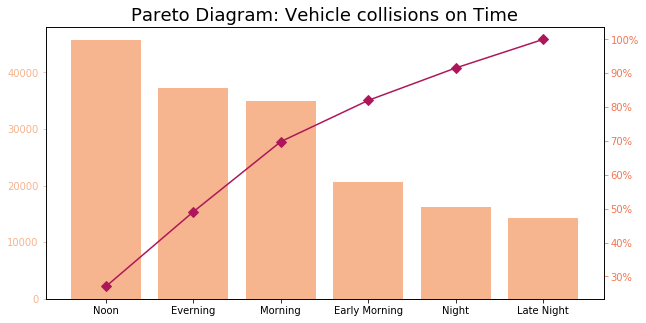

In [18]:
import matplotlib

df["INCTIME"] = pd.to_datetime(df["INCDTTM"])
for idx, dt in enumerate(df["INCDTTM"]):
    if ':' not in dt:
        df["INCTIME"][idx] = np.nan

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon', 'Everning','Night']
df["TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=b, labels=l, include_lowest=True)

df_TOD = pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY'].astype('object')).count())
df_TOD = df_TOD.sort_values(by='OBJECTID',ascending=False)
df_TOD["cumpercentage"] = df_TOD["OBJECTID"].cumsum()/df_TOD["OBJECTID"].sum()*100

fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(df_TOD.index, df_TOD["OBJECTID"])
ax2.plot(df_TOD.index, df_TOD["cumpercentage"], color="C9", marker="D", ms=7)
ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title("Pareto Diagram: Vehicle collisions on Time", fontsize=18)

plt.show()

D:\Anaconda3\envs\TGPU\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D2FF497F0>,
      dtype=object)

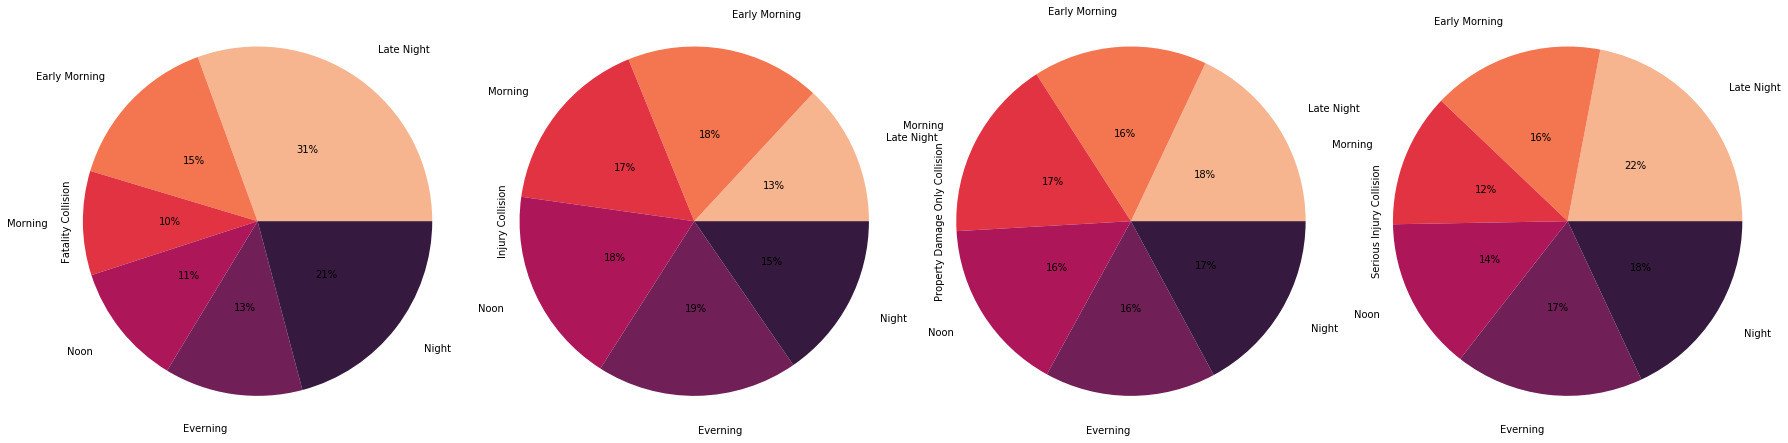

In [19]:
fig, ax = plt.subplots(figsize=(30,20))
df_temp = df.copy()
df_temp = df_temp[df_temp["SEVERITYCODE"]!='0']
(pd.crosstab(df_temp.TIMEOFDAY, df_temp.SEVERITYDESC).apply(lambda r: r/r.sum(), axis=1)*100).plot.pie(subplots=True, ax=ax, autopct='%1.0f%%', pctdistance=0.5,labeldistance=1.2, radius=1.2, legend=None)

# 5. Mapping incidents

In [29]:
import folium
latitude =47.6225
longitude =-122.3520

df_M=df.dropna(subset=['X', 'Y','TIMEOFDAY'])

In [30]:
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_M.Y[:1000], df_M.X[:1000], df_M["TIMEOFDAY"][:1000]):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map